In [1]:
from tensorflow.keras import datasets             # keras MNIST datasets

from sklearn.metrics import confusion_matrix      # prediction verification
import matplotlib.pyplot as plt                   # plotting
import numpy as np                                # numpy functions
import seaborn as sns; sns.set()                  # heatmap
from sklearn.metrics import classification_report # print classification accuracy
from tensorflow.keras.utils import to_categorical # convert data to categorical
from tensorflow.keras import layers               # Neural Network layers

from tensorflow.keras import Sequential           # Neural Network
from keras.callbacks import ModelCheckpoint       # Neural Network callback
from sklearn.naive_bayes import GaussianNB        # Gaussian Naive Bayes
from sklearn.ensemble import RandomForestClassifier  # Random Forest 
from pandas.plotting import scatter_matrix  # scatter plot matrix
from pandas import Series
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
from sklearn.ensemble import RandomForestClassifier # ensemble method
from matplotlib import pyplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
# Load data from tenserflow keras
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

# Label names according to label reference
label_name = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle-boot']

In [6]:
# Set the random seed
random_seed = 2

In [7]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [8]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.1, random_state=random_seed)

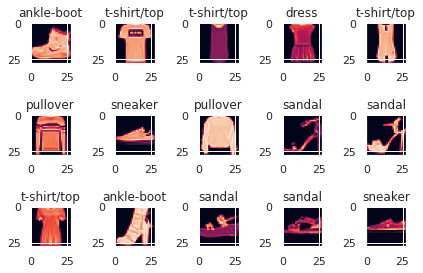

In [ ]:
fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
  axi.imshow(x_train[i])
  axi.set_title(label_name[y_train[i]])
plt.show()

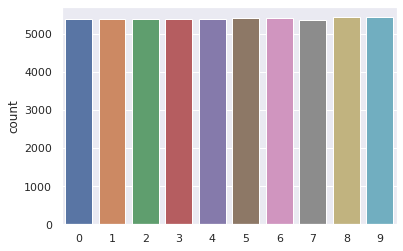

In [ ]:
g = sns.countplot(Y_train)

In [ ]:
# Reshape input data to naive bayes algorithm
w, h = 28, 28
gnb_x_train = x_train.reshape(x_train.shape[0], w*h)
gnb_x_test = x_test.reshape(x_test.shape[0], w*h)

gnb_model = GaussianNB()
%time gnb_model.fit(gnb_x_train, y_train)

CPU times: user 326 ms, sys: 53.2 ms, total: 379 ms
Wall time: 384 ms


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gnb_y_fit = gnb_model.predict(gnb_x_test)

In [ ]:
print(classification_report(y_test, gnb_y_fit, target_names=label_name))

              precision    recall  f1-score   support

 t-shirt/top       0.81      0.59      0.68      1000
     trouser       0.64      0.94      0.76      1000
    pullover       0.59      0.32      0.42      1000
       dress       0.44      0.55      0.49      1000
        coat       0.38      0.78      0.51      1000
      sandal       0.93      0.28      0.43      1000
       shirt       0.32      0.04      0.07      1000
     sneaker       0.51      0.99      0.67      1000
         bag       0.83      0.71      0.77      1000
  ankle-boot       0.91      0.67      0.77      1000

    accuracy                           0.59     10000
   macro avg       0.64      0.59      0.56     10000
weighted avg       0.64      0.59      0.56     10000



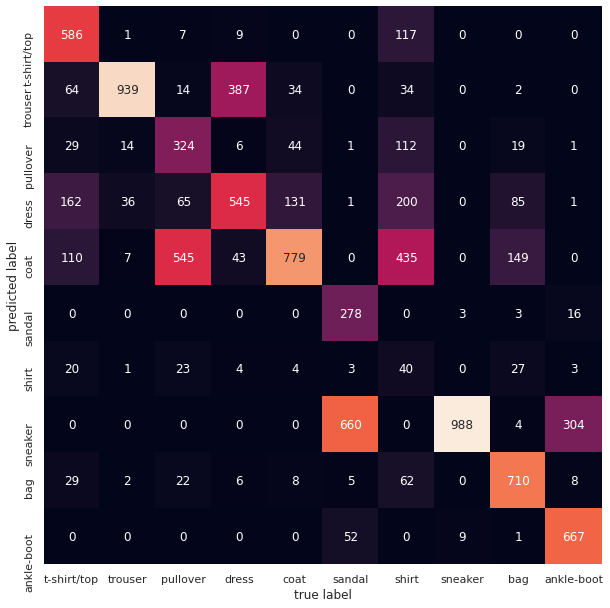

In [ ]:
mat = confusion_matrix(y_test, gnb_y_fit)
plt.figure(figsize=(10, 16))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label_name,
            yticklabels=label_name)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Neural Network

In [9]:
# Reshape input data to fit neural network algorithm
w, h = 28, 28
nn_x_train = x_train.reshape(x_train.shape[0], w, h, 1)
nn_x_test = x_test.reshape(x_test.shape[0], w, h, 1)
nn_y_train = to_categorical(y_train, 10)

In [39]:
nn_model = Sequential()

# Must define the input shape in the first layer of the neural network
nn_model.add(layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
nn_model.add(layers.MaxPooling2D(pool_size=2))
nn_model.add(layers.Dropout(0.3))

nn_model.add(layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
nn_model.add(layers.MaxPooling2D(pool_size=2))
nn_model.add(layers.Dropout(0.3))

nn_model.add(layers.Flatten())
nn_model.add(layers.Dense(256, activation='relu'))
nn_model.add(layers.Dropout(0.5))
nn_model.add(layers.Dense(10, activation='softmax'))

nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
%time nn_model.fit(nn_x_train, nn_y_train, batch_size=64, epochs=20, callbacks=[checkpointer])

Epoch 1/20
938/938 [==============================] - 75s 80ms/step - loss: 0.5920 - accuracy: 0.7825
Epoch 2/20
938/938 [==============================] - 75s 80ms/step - loss: 0.4099 - accuracy: 0.8516
Epoch 3/20
938/938 [==============================] - 75s 80ms/step - loss: 0.3674 - accuracy: 0.8669
Epoch 4/20
938/938 [==============================] - 74s 79ms/step - loss: 0.3366 - accuracy: 0.8777
Epoch 5/20
938/938 [==============================] - 75s 80ms/step - loss: 0.3188 - accuracy: 0.8821
Epoch 6/20
938/938 [==============================] - 75s 80ms/step - loss: 0.3054 - accuracy: 0.8885
Epoch 7/20
938/938 [==============================] - 74s 78ms/step - loss: 0.2928 - accuracy: 0.8927
Epoch 8/20
938/938 [==============================] - 73s 78ms/step - loss: 0.2827 - accuracy: 0.8954
Epoch 9/20
938/938 [==============================] - 74s 79ms/step - loss: 0.2723 - accuracy: 0.8999
Epoch 10/20
938/938 [==============================] - 74s 79ms/step - loss: 0.265

In [40]:
# Convert nn_model prediction results
nn_prediction_results = nn_model.predict(nn_x_test)
nn_y_fit = np.full((10000,), 0, dtype='uint8')

for i in range(0, len(nn_prediction_results)-1, 1):
  nn_y_fit[i] = np.argmax(nn_prediction_results[i])

In [41]:
print(classification_report(y_test, nn_y_fit, target_names=label_name))

              precision    recall  f1-score   support

 t-shirt/top       0.85      0.90      0.87      1000
     trouser       0.99      0.98      0.99      1000
    pullover       0.87      0.89      0.88      1000
       dress       0.90      0.94      0.92      1000
        coat       0.87      0.87      0.87      1000
      sandal       0.99      0.98      0.99      1000
       shirt       0.80      0.72      0.76      1000
     sneaker       0.93      0.99      0.96      1000
         bag       0.99      0.98      0.99      1000
  ankle-boot       0.99      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



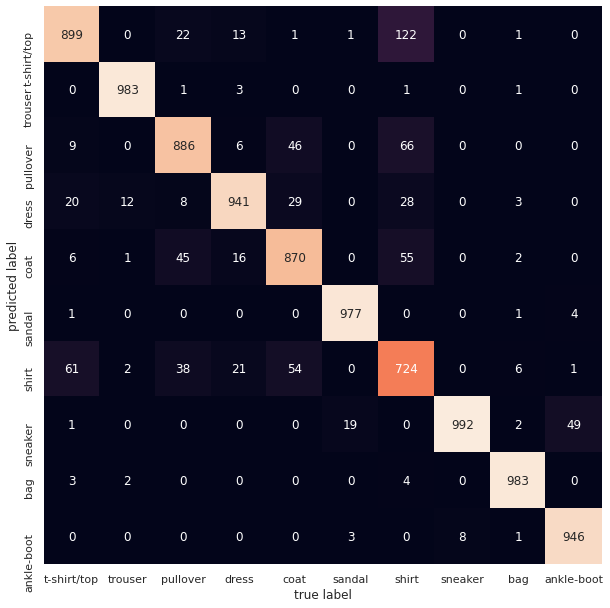

In [42]:
mat = confusion_matrix(y_test, nn_y_fit)
plt.figure(figsize=(10, 16))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label_name,
            yticklabels=label_name)
plt.xlabel('true label')
plt.ylabel('predicted label');

Validation with Random State and Flattened Array

In [20]:
# Load data from tenserflow keras
(train_images, train_labels), (test_images, test_labels)= datasets.fashion_mnist.load_data()

# Label names according to label reference
label_name = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle-boot']

In [21]:
# Now, let us normalize the array values

train_images = train_images/np.float32(255)
test_images = test_images/np.float32(255)

# For classification purposes in python, it will be much better to convert our 2d array into a 1d array, filling in row by row.
# Then we turn our flattened array into a numpy array object. 
def convert(nparray):
    l=[]
    dims=nparray.shape
    for i in range(dims[0]):
        l.append(nparray[i].flatten())
    l=np.array(l)
    return l
train_images_mod = convert(train_images)
test_images_mod  = convert(test_images)


In [36]:
# We will first reshape our data, in order to produce viable results. We will choose that our data has 1 channel, which signals
# that we have a grayscale image. The labels will be turned to categorical.

cnn_train       = train_images_mod.reshape(60000,28,28,1)
cnn_test        = test_images_mod.reshape(10000,28,28,1)
cnn_label_train = to_categorical(train_labels)
cnn_label_test  = to_categorical(test_labels)

# We will also introduce a validation set. 
# points from the test set

cnn_train, cnn_train_val, cnn_label_train, cnn_label_train_val = train_test_split(cnn_train,cnn_label_train, test_size = 0.2, random_state = 2019)

# The model we will build is sequential, going layer by layer. It is also the easiest way to build a model in KERAS.
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
import keras
import keras.utils
from keras import utils as np_utils
from tensorflow.keras.utils import to_categorical
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu' , kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128,activation = 'relu'))
cnn_model.add(Dense(10,activation='softmax'))
cnn_model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])

# Here, we are going to fit the model to our dataset.

cnn_model_training = cnn_model.fit(cnn_train,cnn_label_train,batch_size=64,epochs=25,verbose=1,
                           validation_data=(cnn_train_val,cnn_label_train_val))

Epoch 1/25
750/750 [==============================] - 41s 53ms/step - loss: 0.4678 - accuracy: 0.8295 - val_loss: 0.3614 - val_accuracy: 0.8692
Epoch 2/25
750/750 [==============================] - 41s 55ms/step - loss: 0.3175 - accuracy: 0.8839 - val_loss: 0.2980 - val_accuracy: 0.8928
Epoch 3/25
750/750 [==============================] - 41s 54ms/step - loss: 0.2669 - accuracy: 0.9022 - val_loss: 0.2973 - val_accuracy: 0.8882
Epoch 4/25
750/750 [==============================] - 40s 54ms/step - loss: 0.2377 - accuracy: 0.9122 - val_loss: 0.2945 - val_accuracy: 0.8932
Epoch 5/25
750/750 [==============================] - 40s 54ms/step - loss: 0.2110 - accuracy: 0.9210 - val_loss: 0.2552 - val_accuracy: 0.9053
Epoch 6/25
750/750 [==============================] - 40s 53ms/step - loss: 0.1851 - accuracy: 0.9314 - val_loss: 0.2530 - val_accuracy: 0.9100
Epoch 7/25
750/750 [==============================] - 40s 53ms/step - loss: 0.1679 - accuracy: 0.9382 - val_loss: 0.2493 - val_accuracy:

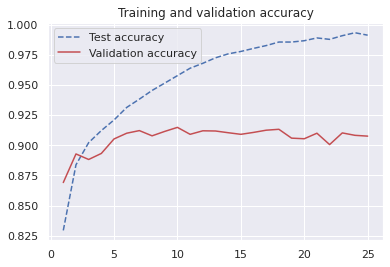

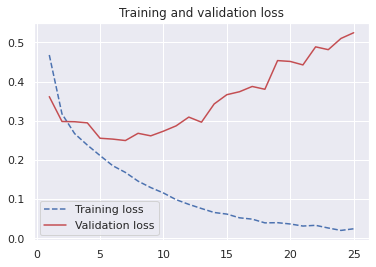

In [37]:
cnn_accuracy     = cnn_model_training.history['accuracy']
cnn_val_accuracy = cnn_model_training.history['val_accuracy']
loss             = cnn_model_training.history['loss'] 
val_loss         = cnn_model_training.history['val_loss']
epochs = [i for i in range (1,26)]

plt.plot(epochs, cnn_accuracy, 'b--', label = 'Test accuracy')
plt.plot(epochs, cnn_val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.savefig('Accuracy values')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b--', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('Loss values')
plt.show()

Adapted from: https://www.tensorflow.org/tutorials/keras/classification


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4965 - accuracy: 0.8239
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3752 - accuracy: 0.8640
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3366 - accuracy: 0.8773
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3132 - accuracy: 0.8843
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2949 - accuracy: 0.8912
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2816 - accuracy: 0.8963
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2691 - accuracy: 0.8999
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2570 - accuracy: 0.9041
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2472 - accuracy: 0.9080
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(label_name[predicted_label],
                                100*np.max(predictions_array),
                                label_name[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

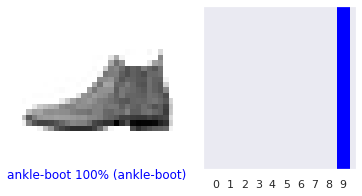

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

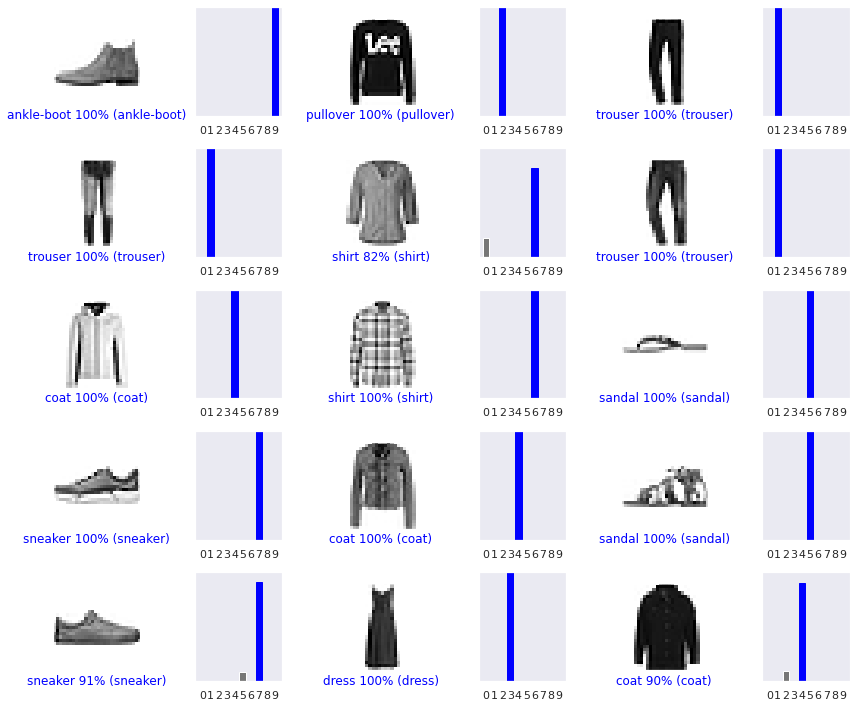

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

CNN + Keras

In [ ]:
# Set the CNN model 

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


In [ ]:
# Define the optimizer
import tensorflow as tf
optimizer = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [ ]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Set a learning rate annealer
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
epochs = 10
batch_size = 86

In [ ]:
# With data augmentation to prevent overfitting 
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(nn_x_train)

In [ ]:
nn_y_test = to_categorical(y_test, 10)

In [ ]:
# Fit the model
history = model.fit(datagen.flow(nn_x_train, nn_y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (nn_x_test,nn_y_test),
                              verbose = 2, steps_per_epoch=nn_x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/10
697/697 - 435s - loss: 0.3799 - accuracy: 0.8663 - val_loss: 0.2861 - val_accuracy: 0.8966
Epoch 2/10
697/697 - 424s - loss: 0.3823 - accuracy: 0.8663 - val_loss: 0.2908 - val_accuracy: 0.8996
Epoch 3/10
697/697 - 420s - loss: 0.3871 - accuracy: 0.8644 - val_loss: 0.2886 - val_accuracy: 0.9004
Epoch 4/10
697/697 - 410s - loss: 0.3872 - accuracy: 0.8663 - val_loss: 0.2990 - val_accuracy: 0.8949

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 5/10
697/697 - 424s - loss: 0.3471 - accuracy: 0.8782 - val_loss: 0.2754 - val_accuracy: 0.9030
Epoch 6/10
697/697 - 427s - loss: 0.3433 - accuracy: 0.8789 - val_loss: 0.2892 - val_accuracy: 0.9020
Epoch 7/10
697/697 - 426s - loss: 0.3403 - accuracy: 0.8781 - val_loss: 0.2799 - val_accuracy: 0.9040
Epoch 8/10
697/697 - 425s - loss: 0.3401 - accuracy: 0.8790 - val_loss: 0.2992 - val_accuracy: 0.9008
Epoch 9/10
697/697 - 425s - loss: 0.3463 - accuracy: 0.8782 - val_loss: 0.2983 - val_accuracy: 0.9027
E

In [ ]:
# MODEL 
keras.utils.plot_model(model, show_shapes=True)

CatBoost

In [ ]:
!pip install catboost
import catboost
print('catboost version:', catboost.__version__)
from catboost import CatBoostClassifier

catboost version: 0.26.1



*******************Fashion MNIST image classification using CatBoost********************
60000 train samples
10000 test samples


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  3.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  3.6min finished


0:	learn: 2.2612260	total: 7.36s	remaining: 2m 56s
1:	learn: 2.2221044	total: 14.2s	remaining: 2m 43s
2:	learn: 2.1835140	total: 21.1s	remaining: 2m 34s
3:	learn: 2.1479440	total: 27.9s	remaining: 2m 26s
4:	learn: 2.1151472	total: 34.6s	remaining: 2m 18s
5:	learn: 2.0821961	total: 41.4s	remaining: 2m 10s
6:	learn: 2.0528357	total: 48s	remaining: 2m 3s
7:	learn: 2.0232843	total: 54.6s	remaining: 1m 56s
8:	learn: 1.9958493	total: 1m 1s	remaining: 1m 49s
9:	learn: 1.9697021	total: 1m 8s	remaining: 1m 42s
10:	learn: 1.9429410	total: 1m 14s	remaining: 1m 35s
11:	learn: 1.9187191	total: 1m 21s	remaining: 1m 28s
12:	learn: 1.8945889	total: 1m 28s	remaining: 1m 21s
13:	learn: 1.8712186	total: 1m 35s	remaining: 1m 15s
14:	learn: 1.8492743	total: 1m 42s	remaining: 1m 8s
15:	learn: 1.8271724	total: 1m 49s	remaining: 1m 1s
16:	learn: 1.8063433	total: 1m 56s	remaining: 54.7s
17:	learn: 1.7858081	total: 2m 3s	remaining: 47.9s
18:	learn: 1.7662778	total: 2m 9s	remaining: 40.9s
19:	learn: 1.7479773	to

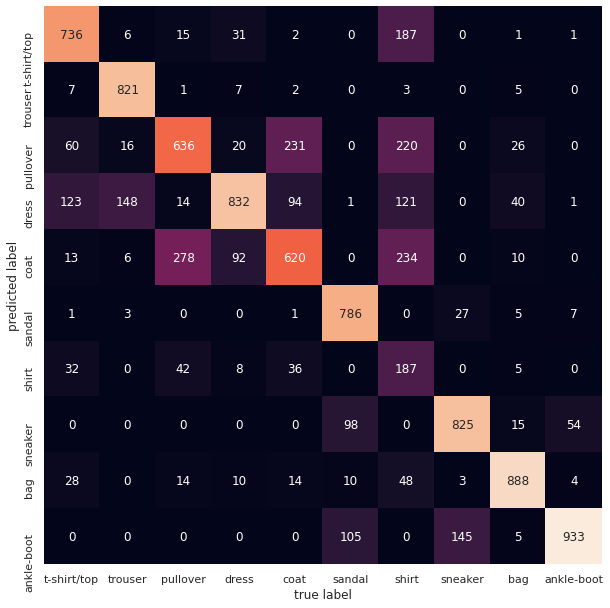

In [ ]:
## How to do Fashion MNIST image classification using CatBoost in Python

def catB(): 

    print()
    print(format('Fashion MNIST image classification using CatBoost','*^88'))

    import warnings
    warnings.filterwarnings("ignore")    

    # load libraries
    from keras.datasets import fashion_mnist
    from sklearn import metrics
    import catboost as ctb
    from sklearn.model_selection import cross_val_score    

    import time
    start_time = time.time()

    # data: shuffled and split between train and test sets
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    
    # X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
    RESHAPED = 784

    X_train = X_train.reshape(60000, RESHAPED)
    X_test = X_test.reshape(10000, RESHAPED)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    # normalize the datasets
    X_train /= 255.
    X_test /= 255.

    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')
    
    # fit a CatBoost model to the data
    model = ctb.CatBoostClassifier(iterations=25, 
                 learning_rate=0.01, depth=6, loss_function='MultiClass')

    cv_results = cross_val_score(model, X_train, y_train, 
                   cv = 2, scoring='accuracy', n_jobs = -1, verbose = 1)    

    model.fit(X_train, y_train)
    
    print(); print(cv_results)    
    print(); print(model)

    # make predictions
    expected_y  = y_test
    predicted_y = model.predict(X_test)

    # summarize the fit of the model
    print(); print(metrics.classification_report(expected_y, predicted_y))
    print(); print(metrics.confusion_matrix(expected_y, predicted_y))
    mat = confusion_matrix(expected_y, predicted_y)
    plt.figure(figsize=(10, 16))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label_name,
            yticklabels=label_name)
    plt.xlabel('true label')
    plt.ylabel('predicted label');

    print()
    print("Execution Time %s seconds: " % (time.time() - start_time))    

catB()


*****************Fashion MNIST image classification using Random Forest*****************
60000 train samples
10000 test samples


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   45.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   45.6s finished



[0.87146667 0.87533333]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=64, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.80      0.78      1000
           3       0.88      0.90      0.89      1000
           4       0.77      0.81      0.79      1000
           5       0.97      0.96      0.97      1000
           6       0.72      0.58      0.64      1

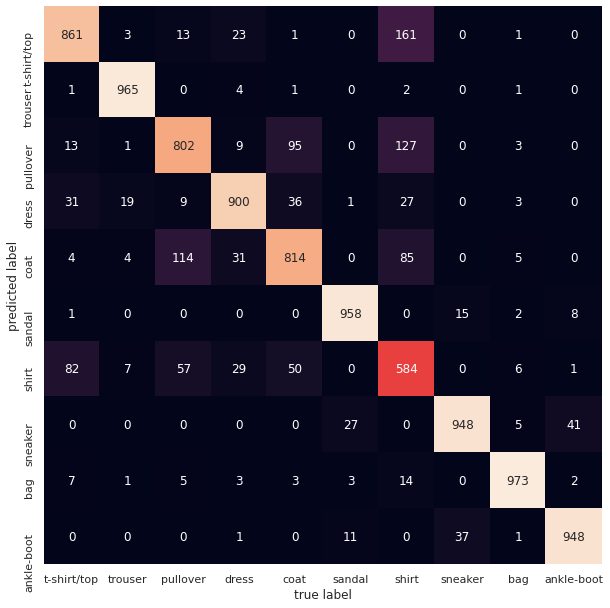

In [38]:
## How to do Fashion MNIST image classification using Random Forest in Python

def rfB(): 

    print()
    print(format('Fashion MNIST image classification using Random Forest','*^88'))

    import warnings
    warnings.filterwarnings("ignore")    

    # load libraries
    from keras.datasets import fashion_mnist
    from sklearn import metrics
    from sklearn.model_selection import cross_val_score    

    import time
    start_time = time.time()

    # data: shuffled and split between train and test sets
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    # Label names according to label reference
    label_name = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle-boot']
    # X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
    RESHAPED = 784

    X_train = X_train.reshape(60000, RESHAPED)
    X_test = X_test.reshape(10000, RESHAPED)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    # normalize the datasets
    X_train /= 255.
    X_test /= 255.

    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')
    
    # fit a Random Forest model to the data
    model = RandomForestClassifier(n_estimators=64, n_jobs=-1)

    cv_results = cross_val_score(model, X_train, y_train, 
                   cv = 2, scoring='accuracy', n_jobs = -1, verbose = 1)    

    model.fit(X_train, y_train)
    
    print(); print(cv_results)    
    print(); print(model)

    # make predictions
    expected_y  = y_test
    predicted_y = model.predict(X_test)

    # summarize the fit of the model
    print(); print(metrics.classification_report(expected_y, predicted_y))
    print(); print(metrics.confusion_matrix(expected_y, predicted_y))
    mat = confusion_matrix(expected_y, predicted_y)
    plt.figure(figsize=(10, 16))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label_name,
            yticklabels=label_name)
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    print()
    print("Execution Time %s seconds: " % (time.time() - start_time))    

rfB()

In [43]:
from xgboost import XGBClassifier


********************Fashion MNIST image classification using XGBoost********************
60000 train samples
10000 test samples


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed: 12.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed: 12.8min finished



[0.86163333 0.86273333]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1000
           1       0.99      0.96      0.97      1000
           2       0.74      0.76      0.75      1000
           3       0.85      0.89      0.87      1000
           4       0.74      0.78      0.76      1000
           5       0.98      0.94      0.96      1000
           6       0.67      0.57      0.62      1000
           7       0.92      0.94      0.93      1000
           8    

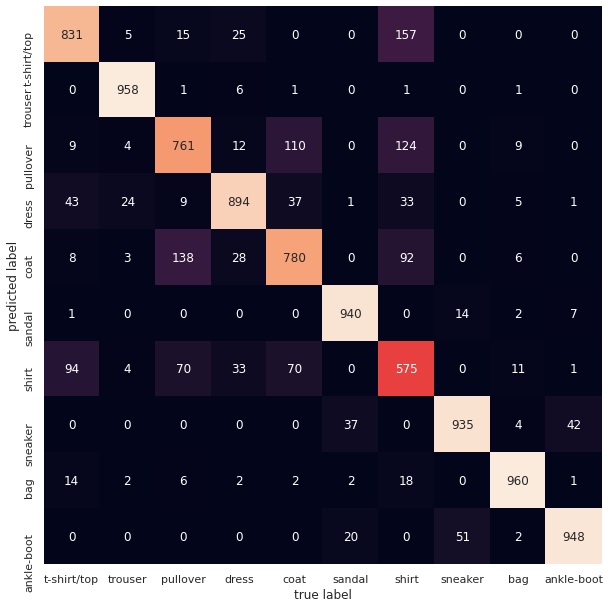

In [44]:
## How to do Fashion MNIST image classification using XGBoost in Python

def xgbB(): 

    print()
    print(format('Fashion MNIST image classification using XGBoost','*^88'))

    import warnings
    warnings.filterwarnings("ignore")    

    # load libraries
    from keras.datasets import fashion_mnist
    from sklearn import metrics
    from sklearn.model_selection import cross_val_score    

    import time
    start_time = time.time()

    # data: shuffled and split between train and test sets
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    # Label names according to label reference
    label_name = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle-boot']
    # X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
    RESHAPED = 784

    X_train = X_train.reshape(60000, RESHAPED)
    X_test = X_test.reshape(10000, RESHAPED)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    # normalize the datasets
    X_train /= 255.
    X_test /= 255.

    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')
    
    # fit a XGBoost model to the data
    model = XGBClassifier(n_jobs=-1)

    cv_results = cross_val_score(model, X_train, y_train, 
                   cv = 2, scoring='accuracy', n_jobs = -1, verbose = 1)    

    model.fit(X_train, y_train)
    
    print(); print(cv_results)    
    print(); print(model)

    # make predictions
    expected_y  = y_test
    predicted_y = model.predict(X_test)

    # summarize the fit of the model
    print(); print(metrics.classification_report(expected_y, predicted_y))
    print(); print(metrics.confusion_matrix(expected_y, predicted_y))
    mat = confusion_matrix(expected_y, predicted_y)
    plt.figure(figsize=(10, 16))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label_name,
            yticklabels=label_name)
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    print()
    print("Execution Time %s seconds: " % (time.time() - start_time))    

xgbB()


**********************Fashion MNIST image classification using KNN**********************
60000 train samples
10000 test samples


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed: 31.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed: 31.7min finished



[0.8455     0.84356667]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1000
           1       0.99      0.96      0.98      1000
           2       0.72      0.81      0.76      1000
           3       0.91      0.87      0.89      1000
           4       0.78      0.76      0.77      1000
           5       1.00      0.81      0.89      1000
           6       0.64      0.56      0.60      1000
           7       0.87      0.97      0.92      1000
           8       0.97      0.95      0.96      1000
           9       0.89      0.96      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


[[863   0  20  19   5   0

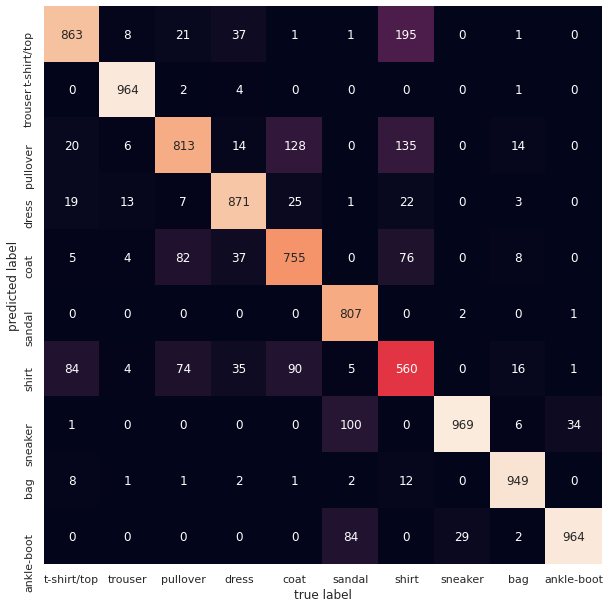

In [5]:
## How to do Fashion MNIST image classification using KNN in Python

def knnB(): 

    print()
    print(format('Fashion MNIST image classification using KNN','*^88'))

    import warnings
    warnings.filterwarnings("ignore")    

    # load libraries
    from keras.datasets import fashion_mnist
    from sklearn import metrics
    import numpy as np
    from sklearn.model_selection import cross_val_score    
    from sklearn.neighbors import KNeighborsClassifier
    import time
    start_time = time.time()

    # data: shuffled and split between train and test sets
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    # Label names according to label reference
    label_name = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle-boot']
    # X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
    RESHAPED = 784

    X_train = X_train.reshape(60000, RESHAPED)
    X_test = X_test.reshape(10000, RESHAPED)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    # normalize the datasets
    X_train /= 255.
    X_test /= 255.

    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')
    
    # fit a KNN model to the data
    model = KNeighborsClassifier(n_neighbors=10, metric='minkowski',p=2)
    

    cv_results = cross_val_score(model, X_train, y_train, 
                   cv = 2, scoring='accuracy', n_jobs = -1, verbose = 1)    

    model.fit(X_train, y_train)
    
    print(); print(cv_results)    
    print(); print(model)

    # make predictions
    expected_y  = y_test
    predicted_y = model.predict(X_test)

    # summarize the fit of the model
    print(); print(metrics.classification_report(expected_y, predicted_y))
    print(); print(metrics.confusion_matrix(expected_y, predicted_y))
    mat = confusion_matrix(expected_y, predicted_y)
    plt.figure(figsize=(10, 16))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label_name,
            yticklabels=label_name)
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    print()
    print("Execution Time %s seconds: " % (time.time() - start_time))    

knnB()

## AutoML Failed Test

In [9]:
# define dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# Label names according to label reference
label_name = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle-boot']
# X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize the datasets
X_train /= 255.
X_test /= 255.


In [14]:
import autosklearn as ask
#ask.regression.AutoSklearnRegressor() for regression tasks
model = ask.classification.AutoSklearnClassifier(ensemble_size=10, #size of the end ensemble (minimum is 1)
                                                 time_left_for_this_task=620, #the number of seconds the process runs for
                                                 per_run_time_limit=30) #maximum seconds allocated per model
model.fit(X_train, y_train) #begin fitting the search model
print(model.sprint_statistics()) #print statistics for the search
y_predictions = model.predict(X_test) #get predictions from the model

auto-sklearn results:
  Dataset name: 82fcfe2e-0c5c-11ec-80cc-0242ac1c0002
  Metric: accuracy
  Number of target algorithm runs: 93
  Number of successful target algorithm runs: 0
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 92



In [15]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_predictions)
print("Accuracy: %.3f" % acc)

Accuracy: 0.100


## Pytorch

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms


import matplotlib.pyplot as plt
import numpy as np

In [3]:
# DECLARE SOME BASIC HYPER-PARAMETERS

n_epochs = 50
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [4]:
BATCH_SIZE = 128

## transformations
transform = transforms.Compose(
    [transforms.ToTensor()])

## download and load training dataset
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

## download and load testing dataset
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


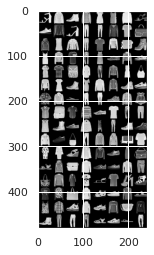

In [5]:
# EXPLORE - WHAT DOES THE DATA LOOK LIKE?

def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

## show images
imshow(torchvision.utils.make_grid(images))

In [6]:
# EXPLORE - WHAT ARE THE DIMENSIONS OF OUR DATA

for images, labels in trainloader:
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break

Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])


In [7]:
# MODEL - BUILD THE MODEL - KEY IN ON DIMENSIONS OF EACH LAYER - MORE AVAILABLE:
# https://pytorch.org/docs/stable/nn.html?highlight=linear#conv2d

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        # 28x28x1 => 26x26x32
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.d1 = nn.Linear(26 * 26 * 32, 128)
        self.d2 = nn.Linear(128, 10)

    def forward(self, x):
        # 32x1x28x28 => 32x32x26x26
        x = self.conv1(x)
        x = F.relu(x)

        # flatten => 32 x (32*26*26)
        x = x.flatten(start_dim = 1)

        # 32 x (32*26*26) => 32x128
        x = self.d1(x)
        x = F.relu(x)

        # logits => 32x10
        logits = self.d2(x)
        out = F.softmax(logits, dim=1)
        return out

In [8]:
model = MyModel()
for images, labels in trainloader:
    print("batch size:", images.shape)
    out = model(images)
    print(out.shape)
    break

batch size: torch.Size([128, 1, 28, 28])
torch.Size([128, 10])


In [9]:
learning_rate = 0.001
num_epochs = 50

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MyModel()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## compute accuracy
def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [10]:
%timeit
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    model = model.train()

    ## training step
    for i, (images, labels) in enumerate(trainloader):
        
        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = model(images)
        loss = criterion(logits, labels)
        optimizer.zero_grad()
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(logits, labels, BATCH_SIZE)
    
    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i)) 
    
print

Epoch: 0 | Loss: 1.7925 | Train Accuracy: 67.62
Epoch: 1 | Loss: 1.6904 | Train Accuracy: 77.75
Epoch: 2 | Loss: 1.6495 | Train Accuracy: 81.83
Epoch: 3 | Loss: 1.6411 | Train Accuracy: 82.56
Epoch: 4 | Loss: 1.6183 | Train Accuracy: 84.92
Epoch: 5 | Loss: 1.5656 | Train Accuracy: 90.23
Epoch: 6 | Loss: 1.5564 | Train Accuracy: 91.08
Epoch: 7 | Loss: 1.5479 | Train Accuracy: 91.99
Epoch: 8 | Loss: 1.5415 | Train Accuracy: 92.67
Epoch: 9 | Loss: 1.5362 | Train Accuracy: 93.18
Epoch: 10 | Loss: 1.5326 | Train Accuracy: 93.48
Epoch: 11 | Loss: 1.5280 | Train Accuracy: 93.94
Epoch: 12 | Loss: 1.5247 | Train Accuracy: 94.27
Epoch: 13 | Loss: 1.5210 | Train Accuracy: 94.64
Epoch: 14 | Loss: 1.5183 | Train Accuracy: 94.92
Epoch: 15 | Loss: 1.5167 | Train Accuracy: 95.07
Epoch: 16 | Loss: 1.5136 | Train Accuracy: 95.35
Epoch: 17 | Loss: 1.5120 | Train Accuracy: 95.51
Epoch: 18 | Loss: 1.5096 | Train Accuracy: 95.73
Epoch: 19 | Loss: 1.5083 | Train Accuracy: 95.90
Epoch: 20 | Loss: 1.5072 | Tra

<function print>

In [11]:
# INTERPRET - HOW DID WE DO ON TEST SET

test_acc = 0.0
for i, (images, labels) in enumerate(testloader, 0):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%( test_acc/i))

Test Accuracy: 91.54
